# Lab 5: Daisyworld

## List of Problems


[Problem Constant](#prob_constant): Daisyworld with a constant growth rate

[Problem Coupling](#prob_coupling): Daisyworld of neutral daisies coupled to
the temperature

[Problem Conduction](#prob_conduction): Daisyworld steady states and the effect
of the conduction parameter R

[Problem Initial](#prob_initial): Daisyworld steady states and initial
conditions

[Problem Temperature](#prob_temperature): Add temperature retrieval code

[Problem Estimate](#prob_estimate): Compare the error estimate to the true
error

[Problem tolerances](#prob_tolerances) User specified error tolerances in
stepsize control

[Problem Adaptive](#prob_adaptive): Adaptive Timestep Code

[Problem Predators](#prob_predator): Adding predators to Daisyworld


## Assignment

See canvas site for which problems you should hand in. Your answers should all be within a jupyter notebook. Use subheadings to organise your notebook by question, and markdown cells to describe what you've done and to answer the questions 
You will be asked to upload:
1. a pdf of your jupyter notebook answering all questions
2. the jupyter notebook itself (ipynb file) - if you want to import your own module code, include that with the notebook in a zipfile


<a name="sec_objectives"></a>

## Objectives

In this lab, you will explore a simple environmental model,
<span>*Daisyworld*</span>, with the help of a Runge-Kutta method with
adaptive stepsize control.

The goal is for you to gain some experience using a Runge-Kutta
integrator and to see the advantages of applying error control to the
algorithm. As well, you will discover the the possible insights one can
garner from the study of numerical solutions of a physical model.

In particular you will be able to:

-   explain how the daisies affect the climate in the daisy world model

-   define adaptive step-size model

-   explain for what reasons an adaptive step-size model maybe faster
    for given accuracy

-   explain why white daisies (alone) can survive at a higher solar
    constant than black daisies

-   define hysteresis

<a name="sec_readings"></a>

## Readings

There is no required reading for this lab, beyond the contents of the
lab itself. However, if you would like additional background on any of
the following topics, then refer to the sections indicated below:

-   **Daisy World:**

    -   The original article by [Watson and Lovelock, 1983](http://ezproxy.library.ubc.ca/login?url=http://onlinelibrary.wiley.com/enhanced/doi/10.1111/j.1600-0889.1983.tb00031.x) which derive the equations used here.

    -   A 2008 Reviews of Geophysics article by [Wood et al.](http://ezproxy.library.ubc.ca/login?url=http://doi.wiley.com/10.1029/2006RG000217) with more recent developments (species competition, etc.)

-   **Runge-Kutta Methods with Adaptive Stepsize Control:**

    -   Newman, Section 8.4

    -   Press, et al. Section 16.2: these are equations we implemented in Python,
        [scanned pdf here](adapt_ode.pdf)

    -   Burden & Faires Section 5.5

<a name="sec_daisyworld"></a>

## Introduction

It is obvious that life on earth is highly sensitive to the planet’s
atmospheric and climatic conditions. What is less obvious, but of great
interest, is the role biology plays in the sensitivity of the climate.
This is dramatically illustrated by the concern over the possible
contribution to global warming by the loss of the rain forests in
Brazil.

The fact that each may affect the other implies that the climate and
life on earth are interlocked in a complex series of feedbacks, i.e. the
climate affects the biosphere which, when altered, then changes the
climate and so on. A fascinating question arises as to whether or not
this would eventually lead to a stable climate. This scenerio is
exploited to its fullest in the <span>*Gaia*</span> hypothesis which
postulates that the biosphere, atmosphere, ocean and land are all part
of some totality, dubbed <span>*Gaia*</span>, which is essentially an
elaborate feedback system which optimizes the conditions of life here on
earth.

It would be hopeless to attempt to mathematically model such a large,
complex system. What can be done instead is to construct a ’toy model’
of the system in which much of the complexity has been stripped away and
only some of the relevant characteristics retained. The resulting system
will then be tractable but, unfortunately, may bear little connection
with the original physical system.

Daisyworld is such a model. Life on Daisyworld has been reduced to just
two species of daisies of different colors. The only environmental
condition that affects the daisy growth rate is temperature. The
temperature in turn is modified by the varying amounts of radiation
absorbed by the daisies.

Daisyworld is obviously a gross simplification of the real earth.
However, it does retain the central feature of interest: a feedback loop
between the climate and life on the planet. Since the equations
governing the system will be correspondingly simplified, it will allow
us to investigate under what conditions, if any, that equilibrium is
reached. The hope is that this will then gain us some insight into how
life on the real earth may lead to a stable climate.

<a name="sec_model"></a>

## The Daisyworld Model

Daisyworld is populated by two types of daisies, one darker than bare ground and the other lighter than bare ground. As with life on earth, the daisies will not grow at extreme temperatures and will have optimum growth at moderate temperatures.

The darker, ’black’ daisies absorb more radiation than the lighter, ’white’ daisies. If the black daisy population grows and spreads over more area, an increased amount of solar energy will be absorbed, which will ultimately raise the temperature of the planet. Conversely, an increase in the white daisy population will result in more radiation being reflected away, lowering the planet’s temperature.

The question to be answered is:

**Under what conditions, if any, will the daisy population and temperature reach equilibrium?**


<a name="sec_population"></a>

### The Daisy Population

The daisy population will be modeled along the lines of standard
population ecology models where the net growth depends upon the current
population. For example, the simplest model assumes the rate of growth
is proportional to the population, i.e.

<!-- \label{lab5:eq:exp} -->

$$
\frac{dA_w}{dt} = k_w A_w
$$

$$
\frac{dA_b}{dt} = k_b A_b
$$

where $A_w$
and $A_b$ are fractions of the total planetary area covered by the white
and black daisies, respectively, and $k_i$, $i=w,b$, are the white and
black daisy growth rates per unit time, respectively. If assume the the
growth rates $k_i$ are (positive) constants we would have exponential
growth like the bunny rabbits of lore.

We can make the model more realistic by letting the daisy birthrate
depend on the amount of available land, i.e. $$k_i = \beta_i x$$ where
$\beta_i$ are the white and black daisy growth rates per unit time and
area, respectively, and $x$ is the fractional area of free fertile
ground not colonized by either species. We can also add a daisy death
rate per unit time, $\chi$, to get

<!-- \label{lab5:eq:model} -->
$\textbf{eq: constantgrowth}$
$$
\frac{dA_w}{dt} = A_w ( \beta_w x - \chi)
$$


$$
\frac{dA_b}{dt} = A_b ( \beta_b x - \chi)
$$

However, even these small modifications are non-trivial mathematically
as the available fertile land is given by,
$$
  x = 1 - A_w - A_b
$$

(assuming all the land mass is fertile) which
makes the equations non-linear.

<div id="prob_constant"></div>

### Problem constant growth

<!-- [lab5:prob:constant] -->

Note that though the daisy growth rate per unit time depends on the amount of available fertile land, it is not
otherwise coupled to the environment (i.e. $\beta_i$ is not a function of temperature. Making the growth a function of bare ground, however, keeps the daisy population bounded and the daisy population will eventually reach some steady state.  The next python cell has a script that runs a fixed timestep Runge Kutte routine that calculates area coverage of white and black daisies for fixed growth rates $\beta_w$ and $\beta_b$. Try changing these growth rates (specified in the derivs5 routine) and the initial white and black concentrations (specified in the fixed_growth.yaml file
discussed next).

1.  For a given set of growth rates try various (non-zero) initial daisy
    populations.

2.  For a given set of initial conditions try various growth rates. In
    particular, try rates that are both greater than and less than the
    death rate.

3.  Can you determine when non-zero steady states are achieved? Explain.


<a name="sec_growth"></a>

### Running the constant growth rate demo

In the appendix we discuss the design of the integrator class and the adaptive Runge-Kutta routine.  For this demo, we need to be able to change variables in the configuration file.  For this demonstration you are asked to:

1.  Change the inital white and black daisy concentrations by changing these lines in the [fixed_growth.yaml](https://github.com/rhwhite/numeric_2022/blob/main/notebooks/lab5/fixed_growth.yaml#L13-L15) input file (you can find this file in this lab directory):

    ```yaml

       initvars:
          whiteconc: 0.2
          blackconc: 0.7
    ```

2.  Change the white and black daisy growth rates by editing the variables beta_w and beta_b in the derivs5 routine in the next cell

To hand in: plot graphs to illustrate how these changes have affected the fractional coverage of black and white daisies over time compared to the original. Comment on the changes that you see.

The Integrator class contains two different timeloops, both of which use embedded Runge Kutta Cash Carp
code given in Lab 4 and coded here as [rkckODE5](https://github.com/rhwhite/numeric_2022/blob/main/numlabs/lab5/lab5_funs.py#L70).  The simplest way to loop through the timesteps is just to call the integrator with a specified set of times.  This is done in [timeloop5fixed](https://github.com/rhwhite/numeric_2022/blob/main/numlabs/lab5/lab5_funs.py#L244).  Below we will describe how to use the error extimates returned by rkckODE5 to tune the size of the timesteps, which is done in [timeloop5Err](https://github.com/rhwhite/numeric_2022/blob/main/numlabs/lab5/lab5_funs.py#L244).

******************************
context imported. Front of path:
/Users/rachelwhite/Documents/Teaching/UBC_Courses/ATSC409_EOSC511/numeric_2022
back of path: /Users/rachelwhite/Applications/miniconda3/envs/numeric_2022/lib/python3.10/site-packages
******************************

through /Users/rachelwhite/Documents/Teaching/UBC_Courses/ATSC409_EOSC511/numeric_2022/notebooks/lab5/context.py


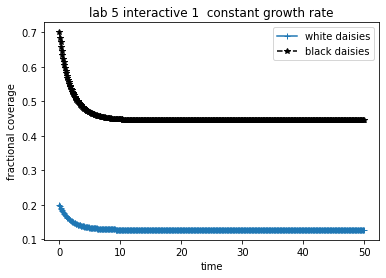

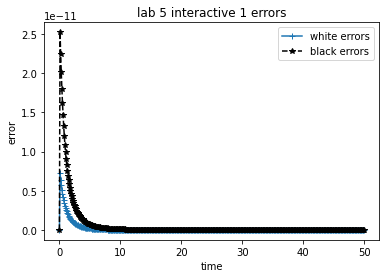

In [2]:
#
# 4.1  integrate constant growth rates with fixed timesteps
#
import context
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt


class Integ51(Integrator):
    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    #
    # Construct an Integ51 class by inheriting first intializing
    # the parent Integrator class (called super).  Then do the extra
    # initialization in the set_yint function
    #
    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           
           Constant growty rates for white
           and black daisies beta_w and beta_b
           
           returns dy/dt
        """
        user = self.uservars
        #
        # bare ground
        #
        x = 1.0 - y[0] - y[1]

        # growth rates don't depend on temperature
        beta_b = 0.7  # growth rate for black daisies
        beta_w = 0.7  # growth rate for white daisies

        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty([self.nvars], 'float')
        f[0] = y[0] * (beta_w * x - user.chi)
        f[1] = y[1] * (beta_b * x - user.chi)
        return f


theSolver = Integ51('fixed_growth.yaml')
timeVals, yVals, errorList = theSolver.timeloop5fixed()

plt.close('all')
thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(timeVals, yVals)
theLines[0].set_marker('+')
theLines[1].set_linestyle('--')
theLines[1].set_color('k')
theLines[1].set_marker('*')
theAx.set_title('lab 5 interactive 1  constant growth rate')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
theAx.legend(theLines, ('white daisies', 'black daisies'), loc='best')

thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(timeVals, errorList)
theLines[0].set_marker('+')
theLines[1].set_linestyle('--')
theLines[1].set_color('k')
theLines[1].set_marker('*')
theAx.set_title('lab 5 interactive 1 errors')
theAx.set_xlabel('time')
theAx.set_ylabel('error')
out = theAx.legend(theLines, ('white errors', 'black errors'), loc='best')

<a name="sec_coupling"></a>

### The Daisy Growth Rate - Coupling to the Environment

We now want to couple the Daisy growth rate to the climate, which we do by making the growth rate a function of the local temperature $T_i$,
$$\beta_i = \beta_i(T_i)$$
The growth rate should drop to zero at extreme temperatures and be optimal at moderate temperatures. In Daisyworld this means the daisy population ceases to grow if the temperature drops below $5^o$C or goes above $40^o $C. The simplest model for the growth rate would then be parabolic function of temperature, peaking at $22.5^o$C:

<!-- \label{lab5:eq:beta_i} -->
$$\beta_i = 1.0 - 0.003265(295.5 K - T_i)^2$$
where the $i$ subscript denotes the type of daisy: grey (i=y), white (i=w) or black (i=b). (We're reserving $\alpha_g$ for the bare ground albedo)

<img src="images/beta.png" width="40%">

Before specifying the local temperature, and its dependence on the daisy
population, first consider the emission temperature $T_e$, which is the
mean temperature of the planet,

<!-- \label{lab5:eq:tempe} -->

$$   T^4_e = L \frac{S_0}{4\sigma}(1-\alpha_p)$$

where $S_0$ is a solar
flux density constant, $L$ is the fraction of $S_0$ received at
Daisyworld, and $\alpha_p$ is the planetary albedo. The greater the
planetary albedo $\alpha_p$, i.e. the more solar radiation the planet
reflects, the lower the emission temperature.

**Mathematical note**: The emission temperature is derived on the assumption that the planet is
in global energy balance and is behaving as a blackbody radiator. See
the appendix for more information.

<div id="prob_coupling"></div>

### Problem Coupling

Consider daisies with the same albedo as the planet, i.e. ’grey’ or neutral daisies, as specified in derivs5 routine below.

1.  For the current value of L (0.2) in the file coupling.yaml, the final daisy steady state is zero. Why is it zero?

2.  Find a value of L which leads to a non-zero steady state.

3.  What happens to the emission temperature as L is varied?  Make a plot of $L$ vs. $T_E$ for 10-15 values of $L$.  To do this, I overrode the value of L from the init file by passing a new value into the IntegCoupling constructor (see [Appendix A](#sec_override)). This allowed me to put

    ```python
    theSolver = IntegCoupling("coupling.yaml",newL)
    timeVals, yVals, errorList = theSolver.timeloop5fixed()
    ```

    inside a loop that varied the L value and saved the steady state concentration
    for plotting

After reading the the next section on the local temperature,

4.  Do you see any difference between the daisy temperature and emission temperature? Plot both and explain.  (Hint: I modified derivs5 to save these variables to self so I could compare their values at the end of the simulation.  You could also override timeloop5fixed to do the same thing at each timestep.)

5.  How (i.e. through what mechanism) does the makeup of the  global daisy population affect the local temperature?


In [3]:
# define functions
import matplotlib.pyplot as plt


class IntegCoupling(Integrator):
    """rewrite the init and derivs5 methods to
       work with a single (grey) daisy
    """
    def set_yinit(self):
        #
        # read in 'albedo_grey chi S0 L  R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'greyconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array([self.initvars.greyconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """
           Make the growth rate depend on the ground temperature
           using the quadratic function of temperature

           y[0]=fraction grey daisies
           t = time
           returns f[0] = dy/dt
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        x = 1.0 - y[0]
        albedo_p = x * user.albedo_ground + y[0] * user.albedo_grey
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        eta = user.R * user.L * user.S0 / (4.0 * sigma)
        temp_y = (eta * (albedo_p - user.albedo_grey) + Te_4)**0.25
        if (temp_y >= 277.5 and temp_y <= 312.5):
            beta_y = 1.0 - 0.003265 * (295.0 - temp_y)**2.0
        else:
            beta_y = 0.0

        # create a 1 x 1 element vector to hold the derivative
        f = np.empty([self.nvars], np.float64)
        f[0] = y[0] * (beta_y * x - user.chi)
        return f

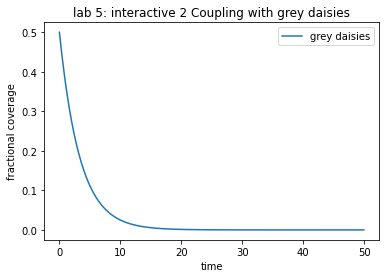

In [4]:
# Solve and plot for grey daisies
import matplotlib.pyplot as plt

theSolver = IntegCoupling('coupling.yaml')
timeVals, yVals, errorList = theSolver.timeloop5fixed()

thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(timeVals, yVals)
theAx.set_title('lab 5: interactive 2 Coupling with grey daisies')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(theLines, ('grey daisies', ), loc='best')

<a name="sec_conductivity"></a>

## The Local Temperature - Dependence on Surface Heat Conductivity

If we now allow for black and white daisies, the local temperature will
differ according to the albedo of the region. The regions with white
daisies will tend to be cooler than the ground and the regions with
black daisies will tend to be hotter. To determine what the temperature
is locally, we need to decide how readily the planet surface
thermalises, i.e. how easily large-scale weather patterns redistributes
the surface heat.

-   If there is perfect heat ‘conduction’ between the different regions
    of the planet then the local temperature will equal the mean
    temperature given by the emission temperature $T_e$.

    <!-- \label{lab5:eq:temp0} -->
    $$
       T^4_i \equiv T^4_e = L \frac{S_0}{4\sigma}(1-\alpha_p)
     $$

-   If there is no conduction, or perfect ‘insulation’, between regions
    then the temperature will be the emission temperature due to the
    albedo of the local region.

    <!-- \label{lab5:eq:temp1} -->
    $$
       T^4_i= L \frac{S_0}{4\sigma}(1-\alpha_i)
    $$
where $\alpha_i$ indicates either $\alpha_g$, $\alpha_w$ or $\alpha_b$.

The local temperature can be chosen to lie between these two values,

<!-- \label{lab5:eq:tempi} -->

$$
  T^4_i = R L \frac{S_0}{4\sigma}(\alpha_p-\alpha_i) + T^4_e
$$

where $R$
is a parameter that interpolates between the two extreme cases i.e.
$R=0$ means perfect conduction and $R=1$ implies perfect insulation
between regions.


<div id="prob_conduction"></a>


### Problem Conduction
The conduction parameter R will determine the temperature differential between the bare ground and the regions with black or white daisies.  The code in the next cell specifies the derivatives for this situation, removing the feedback between the daisies and the planetary albedo but introducint conduction. Use it to investigate these two questions:

1.  Change the value of R and observe the effects on the daisy and emission temperature.

2.  What are the effects on the daisy growth rate and the final steady states?

In [8]:
# 5.2  keep the albedo constant at alpha_p and vary the conductivity R
#
from numlabs.lab5.lab5_funs import Integrator


class Integ53(Integrator):
    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           no feedback between daisies and
           albedo_p (set to ground albedo)
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        x = 1.0 - y[0] - y[1]
        #
        # hard wire the albedo to that of the ground -- no daisy feedback
        #
        albedo_p = user.albedo_ground
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        eta = user.R * user.L * user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25

        if (temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0

        if (temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0

        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty([self.nvars], 'float')
        f[0] = y[0] * (beta_w * x - user.chi)
        f[1] = y[1] * (beta_b * x - user.chi)
        return f

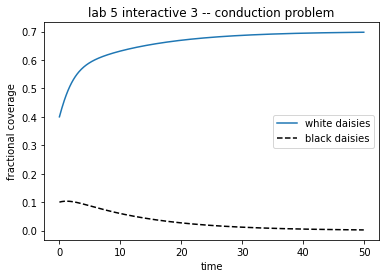

In [11]:
# Solve and plot conduction problem
import matplotlib.pyplot as plt

theSolver = Integ53('conduction.yaml')
timeVals, yVals, errorList = theSolver.timeloop5fixed()

plt.close('all')
thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(timeVals, yVals)
theLines[1].set_linestyle('--')
theLines[1].set_color('k')
theAx.set_title('lab 5 interactive 3 -- conduction problem')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(theLines, ('white daisies', 'black daisies'),
                   loc='center right')

<a name="sec_feedback"></a>

## The Feedback Loop - Feedback Through the Planetary Albedo

The amount of solar radiation the planet reflects will depend on the
daisy population since the white daisies will reflect more radiation
than the bare ground and the black daisies will reflect less. So a
reasonable estimate of the planetary albedo $\alpha_p$ is an average of
the albedo’s of the white and black daisies and the bare ground,
weighted by the amount of area covered by each, i.e.

<!-- \label{lab5:eq:albedop} -->

$$
  \alpha_p = A_w\alpha_w + A_b\alpha_b + A_g\alpha_g
$$

A greater
population of white daisies will tend to increase planetary albedo and
decrease the emission temperature, as is apparent from equation
([lab5:eq:tempe]), while the reverse is true for the black daisies.

To summarize: The daisy population is controlled by its growth rate
$\beta_i$  which is a function of the local
temperature $T_i$ $$\beta_i = 1.0 - 0.003265(295.5 K -T_i)^2$$ If the
conductivity $R$ is nonzero, the local temperature is a function of
planetary albedo $\alpha_p$

$$T_i = \left[ R L \frac{S_0}{4\sigma}(\alpha_p-\alpha_i)
  + T^4_e \right]^{\frac{1}{4}}$$

which is determined by the daisy
population.

-   Physically, this provides the feedback from the daisy population
    back to the temperature, completing the loop between the daisies and
    temperature.

-   Mathematically, this introduces a rather nasty non-linearity into
    the equations which, as pointed out in the lab 1, usually makes it
    difficult, if not impossible, to obtain exact analytic solutions.

<div id="prob_initial"></div>


### Problem Initial
The feedback means a stable daisy population (a
steady state) and the environmental conditions are in a delicate
balance. The code below produces a steady state which arises from a given initial daisy
population,

1.  Add a small initial fraction of black daisies (say, 0.01) to the
    value in initial.yaml and see
    what effect this has on the temperature and final daisy populations.
    Do you still have a final non-zero daisy population?

2.  Attempt to adjust the initial white daisy population to obtain a
    non-zero steady state. Do you have to increase or decrease the
    initial fraction? What is your explanation for this behavior?

3.  Experiment with other initial fractions of daisies and look for
    non-zero steady states.

In [12]:
# functions for problem initial
from numlabs.lab5.lab5_funs import Integrator


class Integ54(Integrator):
    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()

    def find_temp(self, yvals):
        """
            Calculate the temperatures over the white and black daisies
            and the planetary equilibrium temperature given the daisy fractions
            
            input:  yvals -- array of dimension [2] with the white [0] and black [1]
                    daisy fractiion
            output:  white temperature (K), black temperature (K), equilibrium temperature (K)
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        bare = 1.0 - yvals[0] - yvals[1]
        albedo_p = bare * user.albedo_ground + \
            yvals[0] * user.albedo_white + yvals[1] * user.albedo_black
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        temp_e = Te_4**0.25
        eta = user.R * user.L * user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25
        return (temp_w, temp_b, temp_e)

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           no feedback between daisies and
           albedo_p (set to ground albedo)
        """
        temp_w, temp_b, temp_e = self.find_temp(y)

        if (temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0

        if (temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0
        user = self.uservars
        bare = 1.0 - y[0] - y[1]
        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty_like(y)
        f[0] = y[0] * (beta_w * bare - user.chi)
        f[1] = y[1] * (beta_b * bare - user.chi)
        return f

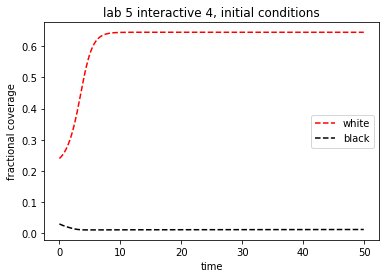

In [13]:
# Solve and plot for problem initial
import matplotlib.pyplot as plt
import pandas as pd

theSolver = Integ54('initial.yaml')
timevals, yvals, errorlist = theSolver.timeloop5fixed()
daisies = pd.DataFrame(yvals, columns=['white', 'black'])

thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(timevals, daisies['white'])
line2, = theAx.plot(timevals, daisies['black'])
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
theAx.set_title('lab 5 interactive 4, initial conditions')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='center right')

<div id="prob_temperature"></div>

### Problem Temperature
The code above in Problem Initial adds a new method, ```find_temp``` that takes the white/black daisy fractions and calculates local and planetary temperatures.

1. override ```timeloop5fixed``` so that it saves these three temperatures, plus the daisy growth rates
   to new variables in the Integ54 instance

2. Make plots of (temp_w, temp_b) and (beta_w, beta_b) vs. time for a case with non-zero equilibrium
   concentrations of both black and white daisies

<a name="sec_adaptive"></a>

## Adaptive Stepsize in Runge-Kutta

<a name="sec_adaptivewhy"></a>

### Why Adaptive Stepsize?

As a rule of thumb, accuracy increases in Runge-Kutta methods as stepsize decreases. At the same time, the number of function evaluations performed increases. This tradeoff between accuracy of the solution and computational cost always exists, but in the ODE solution algorithms presented earlier it often appears to be unnecessarily large. To see this, consider the solution to a problem in two different time intervals - in the first time interval, the solution is close to steady, whereas in the second one it changes quickly. For acceptable accuracy with a non-adaptive method the step size will have to be adjusted so that the approximate solution is close to the actual solution in the second interval. The stepsize will be fairly small, so that the approximate solution is able to follow the changes in the solution here. However, as there is no change in stepsize throughout the solution process, the same step size will be applied to approximate the solution in the first time interval, where clearly a much larger stepsize would suffice to achieve the same accuracy. Thus, in a region where the solution behaves nicely a lot of function evaluations are wasted because the stepsize is chosen in accordance with the most quickly changing part of the solution.

The way to address this problem is the use of adaptive stepsize control. This class of algorithms adjusts the stepsize taken in a time interval according to the properties of the solution in that interval, making it useful for producing a solution that has a given accuracy in the minimum number of steps.

<a name="sec_design"></a>

### Designing Adaptive Stepsize Control

Now that the goal is clear, the question remains of how to close in on it. As mentioned above, an adaptive  algorithm is usually asked to solve a problem to a desired accuracy. To be able to adjust the stepsize in Runge-Kutta the algorithm must therefore calculate some estimate of how far its solution deviates from the actual solution. If with its initial stepsize this estimate is already well within the desired accuracy, the algorithm can proceed with a larger stepsize. If the error estimate is larger than the desired accuracy, the algorithm decreases the stepsize at this point and attempts to take a smaller step. Calculating this error estimate will always increase the amount of work done at a step compared to non-adaptive methods. Thus, the remaining problem is to devise a method of calculating this error estimate that is both
inexpensive and accurate.

<a name="sec_doubling"></a>

### Error Estimate by Step Doubling

The first and simple approach to arriving at an error estimate is to simply take every step twice. The second time the step is divided up into two steps, producing a different estimate of the solution. The difference in the two solutions can be used to produce an estimate of the truncation error for this step.

How expensive is this method to estimate the error? A single step of fourth order Runge-Kutta always takes four function evaluations. As the second time the step is taken in half-steps, it will take 8 evaluations.
However, the first function evaluation in taking a step twice is identical to both steps, and thus the overall cost for one step with step doubling is $12 - 1 = 11$ function evaluations. This should be compared to taking two normal half-steps as this corresponds to the overall accuracy achieved. So we are looking at 3 function evaluations more per step, or an increase of computational cost by a factor of $1.375$.

Step doubling works in practice, but the next section presents a slicker way of arriving at an error estimate that is less computationally expensive. It is the commmonly used one today.

<a name="sec_embedded"></a>

### Error Estimate using Embedded Runge-Kutta

Another way of estimating the truncation error of a step is due to the existence of the special fifth-order Runge-Kutta methods discussed earlier. These methods use six function evaluations which can be recombined to produce a fourth-order method . Again, the difference between the fifth and the fourth order solution is used to calculate an
estimate of the truncation error. Obviously this method requires fewer function evaluations than step doubling, as the two estimates use the same evaluation points. Originally this method was found by Fehlberg, and later Cash and Karp produced the set of constants presented earlier that produce an efficient and accurate error estimate.

<div id="prob_estimate"></div>


### Problem Estimate
In the demo below, compare the error estimate to the true error, on the initial value problem from Lab 4,

$$\frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1$$

which has the exact solution

$$y(t) = t + e^{-t}$$

1.  Play with the time step and final time, attempting small changes at first. How reasonable is the error estimate?

2.  Keep decreasing the time step. Does the error estimate diverge from the computed error? Why?

3.  Keep increasing the time step. Does the error estimate diverge? What is happening with the numerical solution?

In [15]:
# Functions for problem estimate
from numlabs.lab5.lab5_funs import Integrator


class Integ55(Integrator):
    def set_yinit(self):
        #
        # read in 'c1 c2 c3'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in initial yinit
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array([self.initvars.yinit])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()

    def derivs5(self, y, theTime):
        """
           y[0]=fraction white daisies
        """
        user = self.uservars
        f = np.empty_like(self.yinit)
        f[0] = user.c1 * y[0] + user.c2 * theTime + user.c3
        return f

Text(0.5, 1.0, 'lab 5 interactive 5 -- fixed errors')

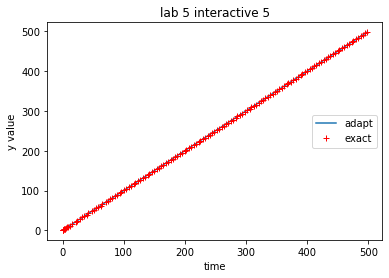

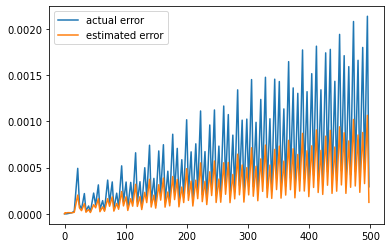

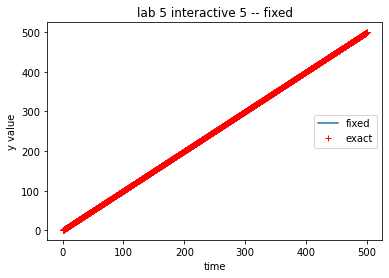

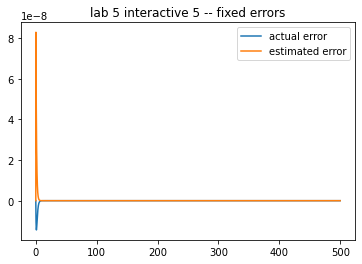

In [16]:
# Solve and plot for problem estimate
import matplotlib.pyplot as plt

theSolver = Integ55('expon.yaml')

timeVals, yVals, yErrors = theSolver.timeloop5Err()
timeVals = np.array(timeVals)
exact = timeVals + np.exp(-timeVals)
yVals = np.array(yVals)
yVals = yVals.squeeze()
yErrors = np.array(yErrors)

thefig, theAx = plt.subplots(1, 1)
line1 = theAx.plot(timeVals, yVals, label='adapt')
line2 = theAx.plot(timeVals, exact, 'r+', label='exact')
theAx.set_title('lab 5 interactive 5')
theAx.set_xlabel('time')
theAx.set_ylabel('y value')
theAx.legend(loc='center right')

#
# we need to unpack yvals (a list of arrays of length 1
# into an array of numbers using a list comprehension
#

thefig, theAx = plt.subplots(1, 1)
realestError = yVals - exact
actualErrorLine = theAx.plot(timeVals, realestError, label='actual error')
estimatedErrorLine = theAx.plot(timeVals, yErrors, label='estimated error')
theAx.legend(loc='best')

timeVals, yVals, yErrors = theSolver.timeloop5fixed()

np_yVals = np.array(yVals).squeeze()
yErrors = np.array(yErrors)
np_exact = timeVals + np.exp(-timeVals)

thefig, theAx = plt.subplots(1, 1)
line1 = theAx.plot(timeVals, np_yVals, label='fixed')
line2 = theAx.plot(timeVals, np_exact, 'r+', label='exact')
theAx.set_title('lab 5 interactive 5 -- fixed')
theAx.set_xlabel('time')
theAx.set_ylabel('y value')
theAx.legend(loc='center right')

thefig, theAx = plt.subplots(1, 1)
realestError = np_yVals - np_exact
actualErrorLine = theAx.plot(timeVals, realestError, label='actual error')
estimatedErrorLine = theAx.plot(timeVals, yErrors, label='estimated error')
theAx.legend(loc='best')
theAx.set_title('lab 5 interactive 5 -- fixed errors')

<a name="sec_adjust"></a>

###  Using Error to Adjust the Stepsize

Both step doubling and embedded methods leave us with the difference
between two different order solutions to the same step. Provided is a
desired accuracy, $\Delta_{des}$. The way this accuracy is specified
depends on the problem. It can be relative to the solution at step $i$,

$$\Delta_{des}(i) = RTOL\cdot |y(i)|$$

where $RTOL$ is the relative
tolerance desired. An absolute part should be added to this so that the
desired accuracy does not become zero. There are more ways to adjust the
error specification to the problem, but the overall goal of the
algorithm always is to make $\Delta_{est}(i)$, the estimated error for a
step, satisfy

$$|\Delta_{est}(i)|\leq\Delta_{des}(i)|$$

Note also that
for a system of ODEs $\Delta_{des}$ is of course a vector, and it is
wise to replace the componentwise comparison by a vector norm.

Note now that the calculated error term is $O(h^{5})$ as it was found as
an error estimate to fourth-order Runge-Kutta methods. This makes it
possible to scale the stepsize as

<div id="eq:hnew"><b>eq:hnew</b></div>
$$h_{new} = h_{old}[{\Delta_{des}\over \Delta_{est}}]^{1/5}$$

or,
to give an example of the suggested use of vector norms above, the new
stepsize is given by

<div id="eq:hnewnorm"><b>eq:hnewnorm</b></div>
$$h_{new} = S h_{old}\{[{1\over N}\sum_{i=1}^{N}({\Delta_{est}(i)\over \Delta_{des}(i)})^{2}]^{1/2}\}^{-1/5}\}$$

using the
root-mean-square norm. $S$ appears as a safety factor ($0<S<1$) to
counteract the inaccuracy in the use of estimates.

The coefficients for the adaptive tolerances are set in adaptvars section of adapt.yaml:

```yaml
adaptvars:
  dtpassmin: 0.1
  dtfailmax: 0.5
  dtfailmin: 0.1
  s: 0.9
  rtol: 1.0e-05
  atol: 1.0e-05
  maxsteps: 2000.0
  maxfail: 60.0
  dtpassmax: 5.0
```

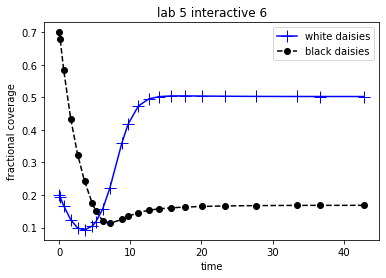

In [17]:
# Solve and plot for adaptive timestep
import matplotlib.pyplot as plt
import pandas as pd

theSolver = Integ54('adapt.yaml')
timeVals, yVals, errorList = theSolver.timeloop5Err()

yvals = pd.DataFrame.from_records(yVals, columns=['white', 'black'])

thefig, theAx = plt.subplots(1, 1)

points, = theAx.plot(timeVals, yvals['white'], '-b+', label='white daisies')
points.set_markersize(12)
theLine1, = theAx.plot(timeVals, yvals['black'], '--ko', label='black daisies')
theAx.set_title('lab 5 interactive 6')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out = theAx.legend(loc='best')

# timeVals,yVals,errorList=theSolver.timeloop5fixed()
# whiteDaisies=[frac[0] for frac in yVals]

<div id="prob_tolerances"></div>


<!-- {#lab5:sec:coding} -->

<a name="sec_coding"></a>

## Coding Runge-Kutta Adaptive Stepsize Control

The Runge-Kutta code developed in Lab 4 solves the given ODE system in fixed timesteps. It is now necessary to exert adaptive timestep control over the solution.  The python code for this is at given in
[these lines.](https://github.com/rhwhite/numeric_2022/blob/main/numlabs/lab5/lab5_funs.py#L145-L197)

In principle, this is pretty simple:

1.  As before, take a step specified by the Runge-Kutta algorithm.

2.  Determine whether the estimated error lies within the user specified tolerance

3.  If the error is too large, calculate the new stepsize with [eq:hnewnorm](#eq:hnewnorm) and retake the step.

This can be accomplished by writing a new [timeloop5Err](https://github.com/rhwhite/numeric_2022/blob/main/numlabs/lab5/lab5_funs.py#L115-L117) method which evaluates each Runge-Kutta step. This routine must now also return the estimate of the truncation error.

In practice, it is prudent to take a number of safeguards. This involves defining a number of variables that place limits on the change in stepsize:

-   A safety factor ($0<S<1$) is used when a new step is
    calculated to further ensure that a small enough step is taken.

-   When a step fails, i.e. the error bound equation is not satisfied,

    -   *dtfailmin*: The new step must change by some minimum factor.

    -   *dtfailmax*: The step cannot change by more than some maximum factor

    -   *maxattempts*: A limit is placed on the number of times a step is retried.

    -   A check must be made to ensure that the new step is larger than machine roundoff. (Check if $t+dt == t$.)

-   When a step passes, i.e. [equation (hnewnorm)](#eq:hnewnorm) is satisfied,

    -   *dtpassmin*: The step is not changed unless it is by some minimum factor.

    -   *dtpassmax*: The step is not changed by more than some maximum factor.

The only remaining question is what to take for the initial step. In theory, any step can be taken and the stepper will adjust the step accordingly. In practice, if the step is too far off, and the error is much larger than the given tolerance, the stepper will have difficulty. So some care must be taken in choosing the initial step.

Some safeguards can also be taken during the integration by defining,

-   *dtmin*: A limit placed on the smallest possible stepsize

-   *maxsteps*: A limit placed on the total number of steps taken.

The Python code for the the adaptive stepsize control is discussed further in Appendix [Organization](#code_org).

<div id="prob_adaptive"></div>

### Problem adaptive
The demos in the previous section solved the Daisyworld equations using the embedded Runge-Kutta methods with adaptive timestep control.

1.  Run the code and find solutions of Daisyworld with the default settings found in adapt.yaml using the timeloop5Err adaptive code

2.  Find the solutions again but this time with fixed stepsizes and compare the size of the timesteps and number of the timesteps.

3.  How much faster does the fixed timeloop need to be to give the same performance as the adaptive timeloop for this case?

<a name="sec_steady"></a>



### Daisyworld Steady States

We can now use the Runge-Kutta code with adaptive timestep control to find some steady states of Daisyworld by varying the luminosity $LS_0$ in the uservars section of adapt.yaml and recording the daisy fractions at the end of the integration. The code was used in the earlier sections to find some adhoc steady state solutions and the effect of altering some of the model parameters. What is of interest now is the effect of the daisy feedback on the range of parameter values for which non-zero steady states exist. That the feedback does have an effect on the steady states was readily seen in [Problem initial](#prob_initial).

If we fix all other Daisyworld parameters, we find that non-zero steady states will exist for a range of solar luminosities which we characterize by the parameter L. Recall, that L is the multiple of the solar constant $S_0$ that Daisyworld receives. What we will investigate in the next few sections is the effect of the daisy feedback on the range of L for which non-zero steady states can exist.

We accomplish this by fixing the Daisyworld parameters and finding the resulting steady state daisy population for a given value of L. A plot is then made of the steady-state daisy populations versus various values of L.

<a name="sec_neutral"></a>

###  Neutral Daisies

The first case we consider is the case investigated in a previous demo where the albedo of the daisies and the ground are set to the same value. This means the daisy population has no effect on the planetary temperature, i.e. there is no feedback ([Problem coupling](#prob_coupling)).

$~$

Daisy fraction -- daisies have ground albedo
<img src="images/steady_g.png" width="40%">

Emission temperature
<img src="images/temp_g.png" width="40%">

<a name="sec_black"></a>

### Black Daisies

Now consider a population of black daisies. Note the sharp jump in the
graph when the first non-zero daisy steady states appear and the
corresponding rise in the planetary temperature. The appearance of the
black daisies results in a strong positive feedback on the temperature.
Note as well that the graph drops back to zero at a lower value of L
than in the case of neutral daisies.

Daisies darker than ground
<img src="images/steady_b.png" width="40%">

Temperature
<img src="images/temp_b.png" width="40%">

<a name="sec_white"></a>

### White Daisies

Consider now a population of purely white daisies. In this case there is
an abrupt drop in the daisy steady state when it approaches zero with a
corresponding jump in the emission temperature. Another interesting
feature is the appearance of hysteresis. This arises since the plot of
steady states is different when solar luminosity is lowered as opposed
to being raised incrementally.

Daisies brighter than ground
<img src="images/steady_w.png" width="40%">

Temperature
<img src="images/temp_w.png" width="40%">

<a name="sec_blackwhite"></a>

### Black and White Daisies

Finally, consider a population of both black and white daisies. This
blends in features from the cases where the daisy population was purely
white or black. Note how the appearance of a white daisy population
initially causes the planetary temperature to actually drop even though
the solar luminosity has been increased.

fraction of black and white daisies
<img src="images/steady_bw.png" width="40%">

note extended temperature range with stabilizing feedbacks
<img src="images/temp_bw.png" width="40%">

<a name="sec_conclusion"></a>

## Conclusion

Black daisies can survive at lower mean temperatures than the white daisies and the reverse is true for white daisies. The end result is that the range of L for which the non-zero daisy steady states exist is greater than the case of neutral (or no) daisies . In other words, the feedback from the daisies provide a stabilizing effect that extends the set of environmental conditions in which life on Daisyworld can exist.


<a name="prob_predator"></a>


### Problem Predator
To make life a little more interesting on Daisyworld, add a population of rabbits that feed upon the daisies. The
rabbit birth rate will be proportional to the area covered by the daisies while, conversely, the daisy *death rate* will be proportional to the rabbit population.

Add another equation to the Daisyworld model which governs the rabbit population and make the appropriate modifications to the existing daisy equations. Modify the set of equations and solve it with the Runge-Kutta method with adaptive timesteps. Use it to look for steady states and to determine their dependence on the initial conditions and model parameters.

Hand in notebook cells that:

1.  Show your modified Daisyworld equations and your new integrator class.

2.  At least one set of parameter values and initial conditions that leads to the steady state and a plot of the timeseries for the daisies and rabbits.

3.  A discussion of the steady state’s dependence on these values, i.e. what happens when they are altered. Include a few plots for illustration.

4.  Does adding this feedback extend the range of habital L values  for which non-zero populations exist?

**Bonus:**: Now consider foxes that prey on rabbits but
leave the daisies alone.

## Appendix: Note on Global Energy Balance

The statement that the earth is in energy balance follows from the First
Law of Thermodynamics, i.e.

**The energy absorbed by an isolated system is equal to the
 change in the internal energy minus the work extracted**

which itself is an expression of the conservation of energy.

For the earth, the primary source of energy is radiation from the sun.
The power emitted by the sun, known as the solar luminosity, is
$L_0=3.9 \times 10^{26}W$ while the energy flux  received at the
mean distance of the earth from the sun ($1.5\times 10^{11}m$) is called
the solar constant, $S_0=1367\ W m^{-2}$. For Daisy World the solar
constant is taken to be $S_0=3668\ W m^{-2}$.

The emission temperature of a planet is the temperature the planet would
be at if it emitted energy like a blackbody. A blackbody, so-called
because it is a perfect absorber of radiation, obeys the
Stefan-Boltzmann Law:

<!-- \label{lab5:stefan-boltzmann-law} -->

\textbf{eq: Stefan-Boltzman}
$$ F_B\ (Wm^{-2}) = \sigma T^4_e$$

  where $\epsilon$ is the energy density and
$\sigma = 5.67\times 10^{-8}Wm^{-2}K^{-4}$. Given the energy absorbed,
it is easy to calculate the emission temperature $T_e$ with
Stefan-Boltzman equation.

In general, a planet will reflect some of the radiation it receives,
with the fraction reflected known as the albedo $\alpha_p$. So the total
energy absorbed by the planet is actually flux density received times
the fraction absorbed times the perpendicular area to the sun ( the
’shadow area’), i.e.

<!-- \label{lab5:energyabsorbed} -->

$$
  E_{\rm absorbed}=S_0(1-\alpha_p)\pi r_p^2$$

where $r^2_p$ is the
planet’s radius.

If we still assume the planet emits like a blackbody, we can calculate
the corresponding blackbody emission temperature. The total power
emitted would be the flux $F_B$ of the blackbody times its
surface area, i.e.

<!-- \label{lab5:energyemitted} -->

$$
   E_{\rm blackbody} = \sigma T^4_e 4\pi  r_p^2$$

Equating the energy absorbed with the energy emitted by a blackbody we
can calculate the emission temperature,

<!-- \label{lab5:emissiontemp} -->

$$
   T^4_e = L \frac{S_0}{4\sigma}(1-\alpha_p)$$



## Summary: Daisy World Equations

$$\frac{dA_w}{dt} = A_w ( \beta_w x - \chi)$$

$$\frac{dA_b}{dt} = A_b ( \beta_b x - \chi)$$

$$x = 1 - A_w - A_b$$

$$\beta_i = 1.0 - 0.003265(295.5 K -T_i)^2$$

$$T^4_i = R L \frac{S_0}{4\sigma}(\alpha_p-\alpha_i) + T^4_e$$

$$\alpha_p = A_w\alpha_w + A_b\alpha_b + A_g\alpha_g$$

$$T^4_e = L \frac{S_0}{4\sigma}(1-\alpha_p)$$

<div id="code_org">

## Appendix:  Organization of the adaptive Runge Kutta routines

* The coding follows [Press et al.](adapt_ode.pdf), with the adaptive Runge Kutta defined
  in the Integrator base class [here](https://github.com/rhwhite/numeric_2022/blob/main/numlabs/lab5/lab5_funs.py#L43-L59)

* The step size choice is made in [timeloop5err](https://github.com/rhwhite/numeric_2022/blob/main/numlabs/lab5/lab5_funs.py#L115-L118)

* To set up a specific problem, you need to overide two methods as demonstrated in the example code:
the member function that initalizes the concentrations: [yinit](https://github.com/rhwhite/numeric_2022/blob/main/numlabs/lab5/lab5_funs.py#L115-L118) and the derivatives routine [derivs5](https://github.com/rhwhite/numeric_2022/blob/main/numlabs/lab5/lab5_funs.py#L66-L68)

* In [Problem Initial](#prob_initial) we define a new member function:

```python

def find_temp(self, yvals):
        """
            Calculate the temperatures over the white and black daisies
            and the planetary equilibrium temperature given the daisy fractions

            input:  yvals -- array of dimension [2] with the white [0] and black [1]
                    daisy fraction
            output:  white temperature (K), black temperature (K), equilibrium temperature (K)
        """
```
which give an example of how to use the instance variable data (self.uservars) in additional calculations.

## Appendix:  2 minute intro to object oriented programming

For a very brief introduction to python classes take a look at [these scipy lecture notes](http://www.scipy-lectures.org/intro/language/oop.html)
that define some of the basic concepts. For perhaps more detail than you want/need to know, see this 2 part
series on [object oriented programming](https://realpython.com/python3-object-oriented-programming) and inheritence ([supercharge your classes with super()](https://realpython.com/python-super/))
Briefly, we need a way to store a lot of information, for
example the Runge-Kutta coefficients, in an organized way that is accessible to multiple functions,
without having to pass all that information through the function arguments. Python solves this problem
by putting both the data and the functions together into an class, as in the Integrator class below.



### Classes and constructors

In [11]:
class Integrator:
    def __init__(self, first, second, third):
        print('Constructing Integrator')
        self.a = first
        self.b = second
        self.c = third

    def dumpit(self, the_name):
        printlist = [self.a, self.b, self.c]
        print(f'dumping arguments for {the_name}: {printlist}')

* ```__init__()``` is called the class constructor

* a,b,c are called class attributes

* ```dumpit()``` is called a member function or method

* We construct and instance of the class by passing the required arguments to ```__init__```

In [12]:
the_integ = Integrator(1, 2, 3)
print(dir(the_integ))
#note that the_integ now has a, b, c, and dumpit

Constructing Integrator
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'a', 'b', 'c', 'dumpit']


* and we call the member function like this:

In [13]:
the_integ.dumpit('Demo object')

dumping arguments for Demo object: [1, 2, 3]


What does this buy us?  Member functions only need arguments specific to them, and can use any
attribute or other member function attached to the self variable, which doesn't need to be
part of the function call.

###  finding the attributes and methods of a class instance

Python has a couple of functions that allow you to see the methods and
attributes of objects

To get a complete listing of builtin and user-defined methods and attributes use

```
 dir
```

In [14]:
dir(the_integ)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'a',
 'b',
 'c',
 'dumpit']

To see just the attributes, use

```
 vars
```

In [15]:
vars(the_integ)

{'a': 1, 'b': 2, 'c': 3}

The inspect.getmembers function gives you everything as a list of (name,object) tuples
so you can filter the items you're interested in.  See:

https://docs.python.org/3/library/inspect.html

In [16]:
import inspect
all_info_the_integ = inspect.getmembers(the_integ)
only_methods = [
    item[0] for item in all_info_the_integ if inspect.ismethod(item[1])
]
print('methods for the_integ: ', only_methods)

methods for the_integ:  ['__init__', 'dumpit']


### Inheritance

We can also specialize a class by driving from a base and then adding more data or members,
or overriding existing values.  For example:

In [17]:
import numpy as np
class Trig(Integrator):
    
    def __init__(self, one, two, three, four):
        print('constructing Trig')
        #
        # first construct the base class
        #
        super().__init__(one, two, three)
        self.d = four

    def calc_trig(self):
        self.trigval = np.sin(self.c * self.d)

    def print_trig(self, the_date):
        print(f'on {the_date} the value of sin(a*b)=: {self.trigval:5.3f}')



In [18]:
sample = Trig(1, 2, 3, 4)
sample.calc_trig()
sample.print_trig('July 5')

constructing Trig
Constructing Integrator
on July 5 the value of sin(a*b)=: -0.537


### Initializing using yaml

To specify the intial values for the class, we use a plain text
format called [yaml](http://www.yaml.org/spec/1.2/spec.html).  To write a yaml
file, start with a dictionary that contains entries that are themselves dictionaries:

In [19]:
import yaml
out_dict = dict()
out_dict['vegetables'] = dict(carrots=5, eggplant=7, corn=2)
out_dict['fruit'] = dict(apples='Out of season', strawberries=8)
with open('groceries.yaml', 'w') as f:
    yaml.safe_dump(out_dict, f)

In [20]:
#what's in the yaml file?
#each toplevel dictionary key became a category
import sys  #output to sys.stdout because print adds blank lines
with open('groceries.yaml', 'r') as f:
    for line in f.readlines():
        sys.stdout.write(line)

fruit:
  apples: Out of season
  strawberries: 8
vegetables:
  carrots: 5
  corn: 2
  eggplant: 7


In [21]:
#read into a dictionary
with open('groceries.yaml', 'r') as f:
    init_dict = yaml.safe_load(f)
print(init_dict)

{'fruit': {'apples': 'Out of season', 'strawberries': 8}, 'vegetables': {'carrots': 5, 'corn': 2, 'eggplant': 7}}


<div id="sec_override">

### Overriding initial values in a derived class

Suppose we want to change a value like the strength of the sun, $L$, after it's been
read in from the initail yaml file?  Since a derived class can override the yinit function
in the Integrator class, we are free to change it to overwrite any variable by reassigning
the new value to self in the child constructor.

Here's a simple example showing this kind of reinitialization:

In [22]:
import numpy as np


class Base:
    #
    # this constructor is called first
    #
    def __init__(self, basevar):
        self.L = basevar


class Child(Base):
    #
    # this class changes the initialization
    # to add a new variable
    #
    def __init__(self, a, L):
        super().__init__(a)
        #
        # change the L in the child class
        #
        self.L = L

Now we can use Child(a,Lval) to construct instances with any value of L we want:

In [23]:
Lvals = np.linspace(0, 100, 11)

#
# now make 10 children, each with a different value of L
#
a = 5
for theL in Lvals:
    newItem = Child(a, theL)
    print(f'set L value in child class to {newItem.L:3.0f}')

set L value in child class to   0
set L value in child class to  10
set L value in child class to  20
set L value in child class to  30
set L value in child class to  40
set L value in child class to  50
set L value in child class to  60
set L value in child class to  70
set L value in child class to  80
set L value in child class to  90
set L value in child class to 100


To change L in the IntegCoupling class in [Problem Conduction](#prob_conduction) look at
changing the value above these lines:

```python
initvars = namedtuple('initvars', self.config['initvars'].keys())
self.initvars = initvars(**self.config['initvars'])
```

### Specific example

So to use this technique for [Problem Conduction](#prob_conduction), override `set_yinit` so that
it will take a new luminosity value newL, and add it to uservars, like this:

```python
class IntegCoupling(Integrator):
    """rewrite the set_yinit method
       to work with luminosity
    """

    def set_yinit(self, newL):
        #
        # change the luminocity
        #
        self.config["uservars"]["L"] = newL # change solar incidence fraction
        #
        # make a new namedtuple factory called uservars that includes newL 
        #
        uservars_fac = namedtuple('uservars', self.config['uservars'].keys())
        #
        # use the factory to make the augmented uservars named tuple
        #
        self.uservars = uservars_fac(**self.config['uservars'])
        #


    def __init__(self, coeffFileName, newL):
       super().__init__(coeffFileName)
       self.set_yinit(newL)
       
    ...
```

then construct a new instance with a value of newL like this:

```python
theSolver = IntegCoupling("coupling.yaml", newL)
```

The IntegCoupling constructor first constructs an instance of the Integrator
class by calling `super()` and passing it the name of the yaml file.  Once this
is done then it
calls the `IntegCoupling.set_yinit` method which takes the Integrator class instance
(called "self" by convention) and modifies it by adding newL to the usersvars
attribute.

Try executing

```python
newL = 50
theSolver = IntegCoupling("coupling.yaml", newL)
```

and verify that:

`theSolver.uservars.L`  is indeed 50

#### Check your understanding

To see if you're really getting the zeitgeist, try an alternative design where
you leave the constructor as is, and instead add a new method called:

```python
def reset_L(self,newL)
```

so that you could do this:

```python
newL = 50
theSolver = IntegCoupling("coupling.yaml")
theSolver.reset_L(newL)
```

and get `theSolver.uservars.L` set to 50.

### Why bother?

What does object oriented programming buy us?  The dream was that companies/coders could ship
standard base classes, thoroughly tested and documented, and then users could adapt those
classes to their special needs using inheritence.  This turned out to be too ambitous,
but a dialed-back version of this is definitely now part of many major programming languages.